# Introduction

In today's world, machine learning algorithms are used in almost all areas of people's lives. Aim of this notebook is to analyse the provided dataset with the aid of graphs and apply Logistic Regression algorithm that will help to predict diabetes. It is IMPORTANT to keep in mind that the following system cannot be an accurate basis for diagnosing diabetes, since for the final verdict it is worth visiting a medical specialist. However, the following model can help to determine the main risk group based on the symptoms, age, gender of patients, and more.

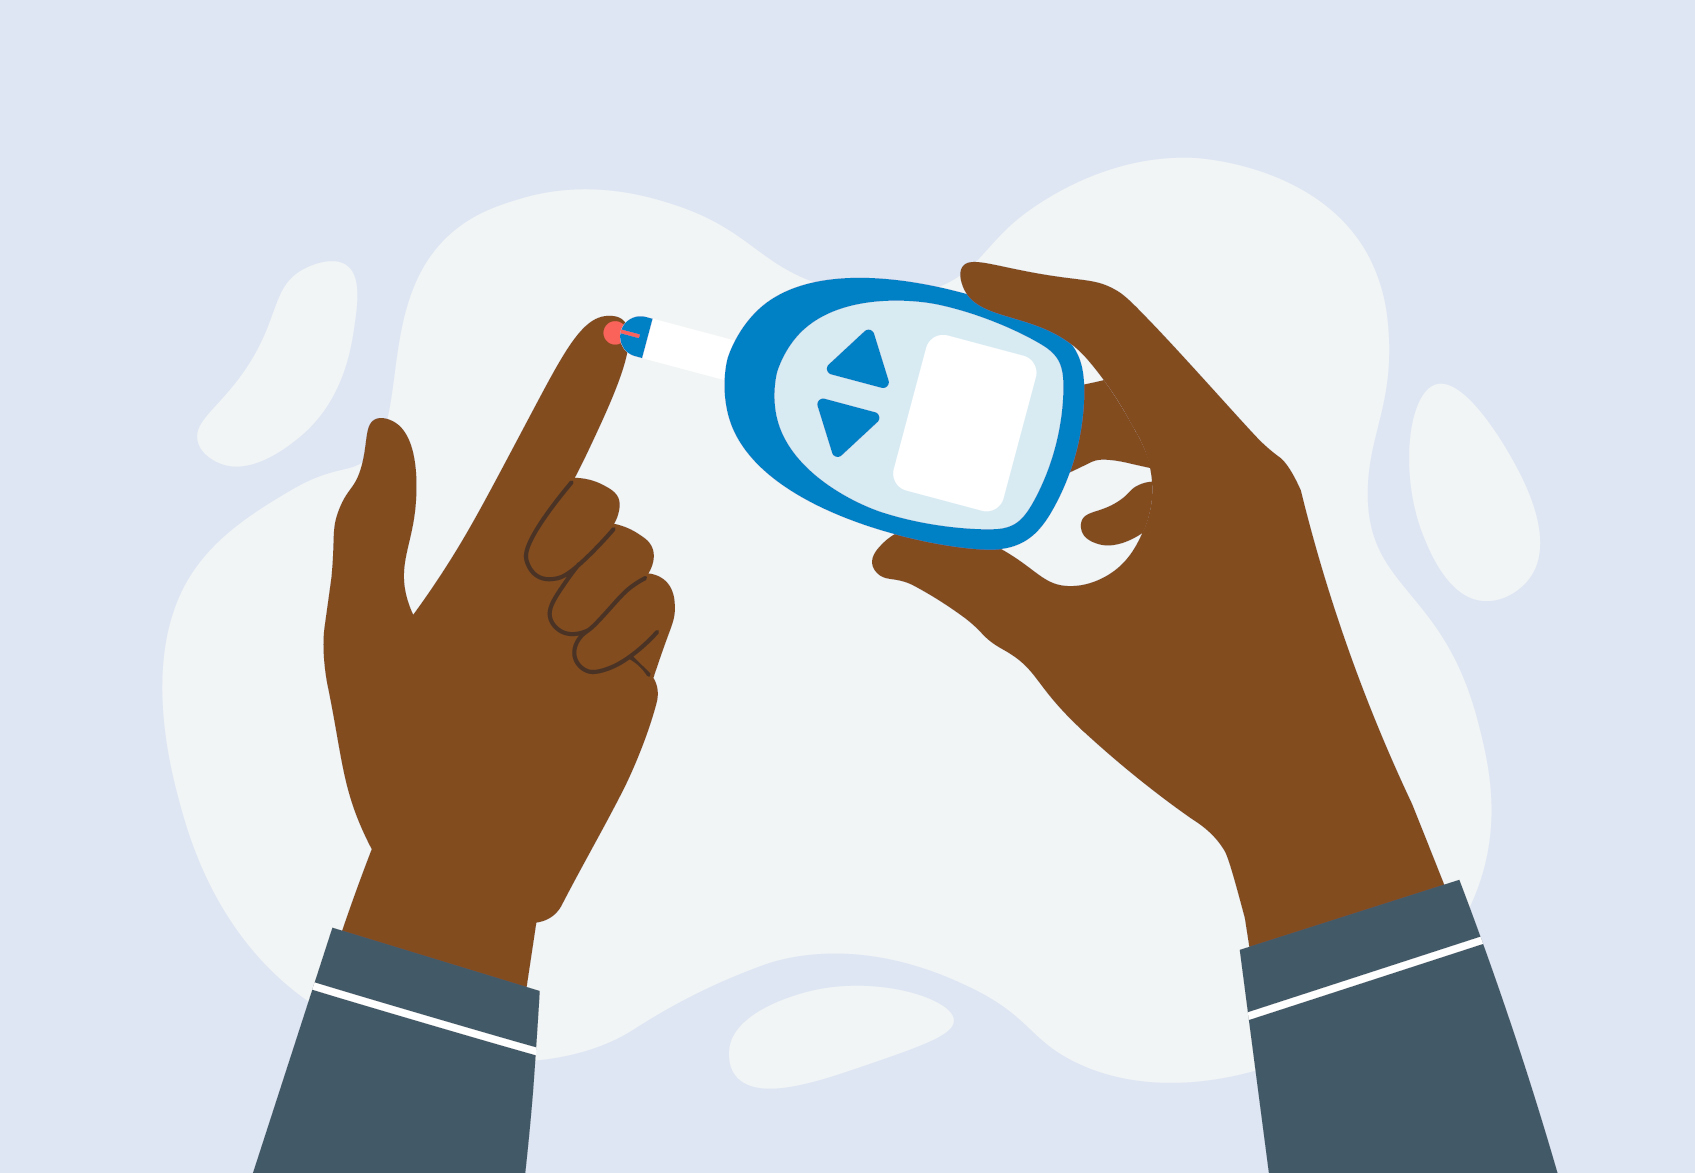

# Importing Data & Python Libraries

Before proceeding working with data, lets import all necessary Python packages first.

In [1]:
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter(action='ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv("../input/diabetes-data-set/diabetes.csv")

df.head() #Display the first 5 rows of the imported dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As we can see from the table above, there are 9 columns:
- Pregnancies
- Glucose
- BloodPressure
- SkinTHickness
- Insulin
- BMI
- DiabetesPedigreeFunction (indicates the function which scores likelihood of diabetes based on family history)
- Age
- Outcome (If outcome is {1} then the person has diabetes, if {0} the person has no diabetes)


Lets see the dataset size:

In [3]:
df.shape

(768, 9)

As we can see from the output above, there are 9 columns and 768 rows in the dataset. Is there any missing values? We can find it out with the following function:

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset is pretty clean, therefore, there were no NaN values found. However, lets check if there are any 0 values in the "SkinThickness" column:


In [5]:
df['SkinThickness'].value_counts()[0]

227

I am sure that we will find zeros in other columns, but lets not waste our time for that and replace zeros with the Mean values in each column.

In [6]:
thickness = df['SkinThickness']
glucose = df['Glucose']
b_pressure = df['BloodPressure']
insulin = df['Insulin']
bmi = df['BMI']
pedigree_f = df['DiabetesPedigreeFunction']
thickness.replace(to_replace = 0, value = thickness.mean(), inplace=True)
glucose.replace(to_replace = 0, value = glucose.mean(), inplace=True)
b_pressure.replace(to_replace = 0, value = b_pressure.mean(), inplace = True)
insulin.replace(to_replace = 0, value = insulin.mean(), inplace = True)
bmi.replace(to_replace = 0, value = bmi.mean(), inplace = True)
pedigree_f.replace(to_replace = 0, value = pedigree_f.mean(), inplace = True)

Now, the data is almost prepared for the model training. Before that, we will check what are the data types present in the dataset:

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Great, we have Integer and Float data types, which means we don't need to deal with the strings and convert them into the binary format. 

The dataset is pretty small, therefore, we will not be focusing on removing outliers, since it will make the dataset even smaller.

Next, we will rename our target column "Outcome" to "Result" for a better understanding, and print the output.

In [8]:
df = df.rename(columns = {'Outcome':'Result'})

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Done, we can now start with the data analysis.

# Data Analysis

Before model training, we will try to get more insights and column trends from our dataset with the aid of graphs.

**What do we want to know about our dataset?**

Lets list down few questions and try answer them using graphs:

- How many positive cases can be observed in each Age group?
- What is the relationship between glucose level and age?
- What is the relationship between blood pressure and age?
- How many people in the study had pregnancies?

We will stop on these four questions and see what our data will tell us.

# 1 - How many positive cases can be observed in each Age Group?

First, we will plot the age distribution graph in order to understand how many samples of data were taken for each Age Group.

In [9]:
# age distribution

hist_data =[df["Age"].values]
group_labels = ['Age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

As it can be seen from the histogram above, people from 21 to 30 years old actively participated in the study, from 30 to 50 less actively, and for people over 50, the least data was collected.

Now, lets plot the histogram that will show us how many positive and negative diabetes cases were observed in each age group.

In [10]:
negative = df[df["Result"]==0]["Age"]
positive = df[df["Result"]==1]["Age"]
hist_data = [negative,positive]
group_labels = ['Negative', 'Positive']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Diabetes Status")
fig.show()

- The hishest value of positive diabetes cases was observed from the age of 21 to 45. However, the data collected is pretty diverse, since the amount of samples taken from the age 21 is the highest compared to others. Therefore, it would be more correct to say that the most diabetes cases were observed from the age of 30 to 45.

# 2 - What is the relationship between glucose level and age?

In order to find out what is the relationship between glucose level and age, we will plot the correlation between "Age" and "Glucose" columns.

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

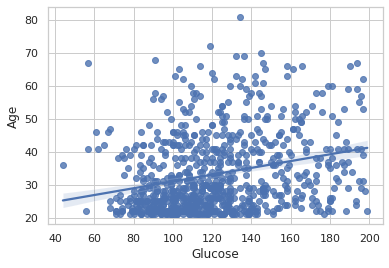

In [11]:
sns.regplot(x=df["Glucose"], y=df["Age"])

The correlation above illustrates that at the age below 30, the glucose level was tightly ranging from 75 to 140 (the normal level should be between 80 - 130 mg/dL). The higher the age, the more the glucose level is biased towards higher numbers.

# 3 - What is the relationship between blood pressure and age?

Repeat the steps mentioned above in order to plot the correlogram.

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

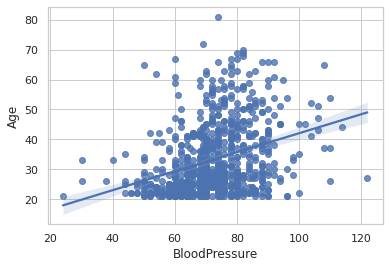

In [12]:
sns.regplot(x=df['BloodPressure'], y=df['Age'])

The blood pressure is increasing over the age as it can be seen from the correlation above.

# 4 - How many people in the study had pregnancies before?

In [13]:
labels = ['Pregnant before','Never Pregnant']
pregnant = df[df['Pregnancies']>0]
not_pregnant = df[df['Pregnancies']==0]
values = [len(pregnant), len(not_pregnant)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

85.5% of the people had at least 1 pregnancies, while other 14.5% had never experienced pregnancy before. Based on the pie chart above, it can be seen that the dataset will not be able to give us a clear image about those who had never experienced pregnancy before, since the majority of samples were pregnant at least 1 time. This fact can negatively affect the training process of our model.

# Model Preparation

Now we are going to split our dataset into Train and Test sets. Usually, the training and test sets are divided in a ratio of 80:20, respectively. Why is it 80:20 ratio? Well, the answer lies in the Pareto Principle. I am not going dive into the details and explain the whole idea of Pareto Principle, however I will give the basic idea of it:

- "80 percent of the output from a given situation or system is determined by 20 percent of the input."

It is worth to mention, that it is not compulsory to use 80:20 ratio, since it can be 70:30 as well. However, if we want to achieve a better results in model training we are going to split our dataset, where 80% of the data will be used for training and other 20% for testing. 

Refer to the figure below for a better undestanding:

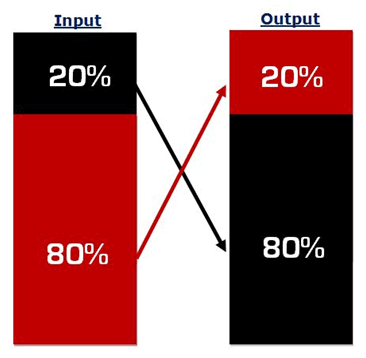

Simply speaking, if we use 80% of the data during testing, we will get a poor accuracy, while if we use 20% of the data during testing, we will get a better results. As was mentioned before, we can use any ratio we want, but we will stick to the standard ratio for now.

Below are some useful links where you can find out more information about Pareto Principle and its application in Machine Learning:
- https://en.wikipedia.org/wiki/Pareto_principle#Mathematical_notes
- https://towardsdatascience.com/finally-why-we-use-an-80-20-split-for-training-and-test-data-plus-an-alternative-method-oh-yes-edc77e96295d
- https://eazybi.com/blog/the-80-20-rule

Before splitting data into training and test sets, it is necessary to identify our target and features columns. In this case, Target column will be "Result", while other 8 columns will be Features, based on which our model will try to predict the target. 

In [14]:
X = df.drop(columns = 'Result', axis = 1)  # Our features
y = df['Result']  # Our target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2) 
#prepare for training

The code line above was used to split the features and target columns into train and test sets randomly. 
We can display the output for features as follows:

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Features contain 768 rows and 8 columns, while 614 rows was used for training, and 154 wors were used for testing.

Now its time to define the model we are going to use. Since we are solving a classification problem, we will use Logistic Regression model. There is a possibility to use other machine learning algorithms, for example: "K-Nearest Neighbors", "Random Forest", "Decision Tree", etc. However, since the dataset is pretty small, we will use them somewhere else.

In [17]:
model = LogisticRegression()

# Model Training

Lets use .fit() function to feed our model with the training sets for both: features and target.

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

Perfect, now we will find the accuracy and precision scores for training and test data.

In [19]:
# Finding Accuracy for training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_precision = precision_score(X_train_prediction, y_train)

In [20]:
print('Accuracy on training data : ', training_data_accuracy)
print('Precision on training data : ', training_data_precision)

Accuracy on training data :  0.7801302931596091
Precision on training data :  0.5420560747663551


In [21]:
# Finding Accuracy for testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
testing_data_precision = precision_score(X_test_prediction, y_test)

In [22]:
print('Accuracy on testing data : ', testing_data_accuracy)
print('Precision on testing data : ', testing_data_precision)

Accuracy on testing data :  0.7532467532467533
Precision on testing data :  0.5


The accuracy and precision is pretty low. What could be the reasons for that? Well, as it could be seen from the data analysis, the data is diverse and the age groups selected in the dataset are not equal in terms of volume. This and many other factors may negatively affect the accuracy and precision of the developed model.